# Aim : This Notebook is Ment to help with visualizing Text data Only 

#### My main goal is to make a common notebook which includes all the methods required for eda.

I will be making use of 

1. Movie Review Classification :
This is binary class problem we in we need to classify if a review is positive or negative. class 1 for +ve and 
0 for negative.


This is an always on going, work in progress notebook. I will be adding new things and usefull methods as a come accorss new articles.

This kernel is intented to be used as a cheatsheet for hackathons to act as a template for eda. This is not the final version of this note book new things can be added and removed.




In [268]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS 
from tqdm import tqdm
import warnings 

warnings.filterwarnings('default')

In [9]:
dataset = pd.read_csv('labeledTrainData.tsv.zip',sep='\t')

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [12]:
dataset.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


## Lets Read some data reviews 

#### Postive Review

In [44]:
dataset[dataset.sentiment == 1]['review'][1]

'\\The Classic War of the Worlds\\" by Timothy Hines is a very entertaining film that obviously goes to great effort and lengths to faithfully recreate H. G. Wells\' classic book. Mr. Hines succeeds in doing so. I, and those who watched his film with me, appreciated the fact that it was not the standard, predictable Hollywood fare that comes out every year, e.g. the Spielberg version with Tom Cruise that had only the slightest resemblance to the book. Obviously, everyone looks for different things in a movie. Those who envision themselves as amateur \\"critics\\" look only to criticize everything they can. Others rate a movie on more important bases,like being entertained, which is why most people never agree with the \\"critics\\". We enjoyed the effort Mr. Hines put into being faithful to H.G. Wells\' classic novel, and we found it to be very entertaining. This made it easy to overlook what the \\"critics\\" perceive to be its shortcomings."'

Will need to take care of '\\' , '"' also words words like H.G. Wells will have some meaning if we blindly replace '.' with space then the words would be seperated eg. (["h",'g','wells'])

# Negative Review

In [48]:
dataset[dataset.sentiment == 0]['review'][2]

"The film starts with a manager (Nicholas Bell) giving welcome investors (Robert Carradine) to Primal Park . A secret project mutating a primal animal using fossilized DNA, like ¨Jurassik Park¨, and some scientists resurrect one of nature's most fearsome predators, the Sabretooth tiger or Smilodon . Scientific ambition turns deadly, however, and when the high voltage fence is opened the creature escape and begins savagely stalking its prey - the human visitors , tourists and scientific.Meanwhile some youngsters enter in the restricted area of the security center and are attacked by a pack of large pre-historical animals which are deadlier and bigger . In addition , a security agent (Stacy Haiduk) and her mate (Brian Wimmer) fight hardly against the carnivorous Smilodons. The Sabretooths, themselves , of course, are the real star stars and they are astounding terrifyingly though not convincing. The giant animals savagely are stalking its prey and the group run afoul and fight against on

# Checking Class Balance 

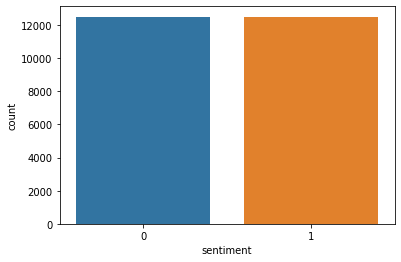

In [23]:
sns.countplot(dataset['sentiment'],)
plt.show()

# Text Eda 

wordcloud : The best was to visualize text is to 
create a word cloud this shows the differnt words 
present in the dataset. 
we can also create seperate wordclouds per class 
and see dominating words, remove common words.
This can also help us find misspelled words.

The getWordCloud method will take in a text column 
and plot the wordcloub

In [27]:
def getWordCloud(x,withLower = False):
    
    # the word cloud accepts a string
    comment_words = " "
    
    for val in x: 
        
        if withLower:
            comment_words += " " + val.lower()
        else:
            comment_words += " " + val
            
    
    wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                min_font_size = 10).generate(comment_words) 
  
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
  
    plt.show() 
        

# Word Cloud For Entire Dataset 

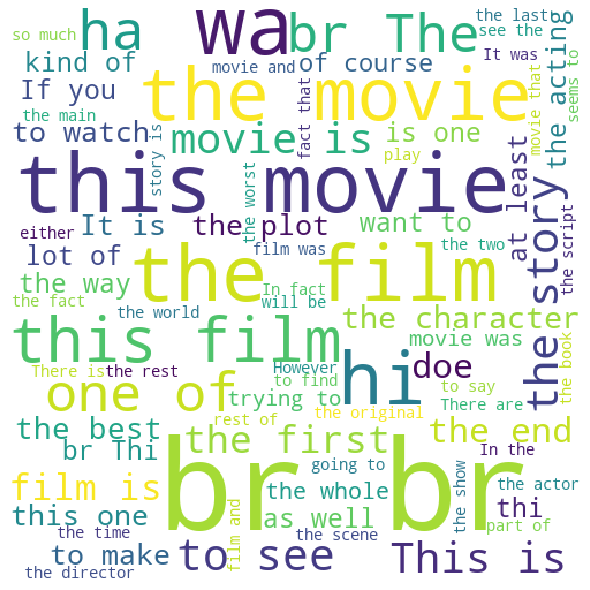

In [29]:
getWordCloud(dataset['review'])

# WordCloud For Positive Class 

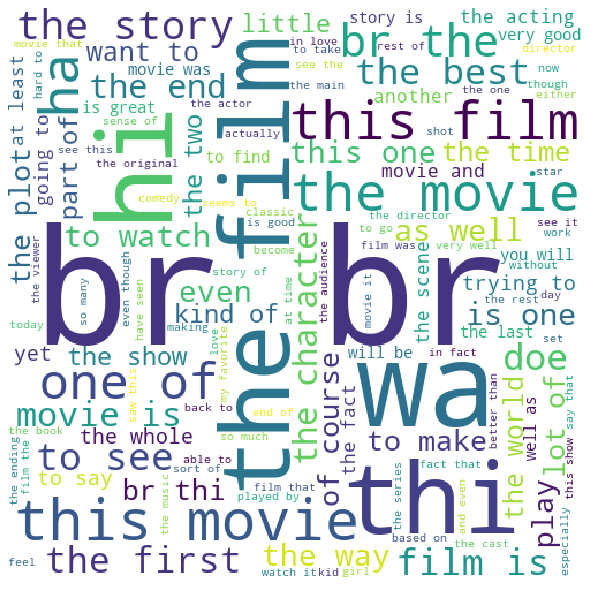

In [30]:
getWordCloud(dataset[dataset.sentiment == 1]['review'],True)

We have found some misspellings thi which is obvously the , wa should be was and doe can be does

I Will be including the misspellig correction at the end of this notebook. Thought this steps comes in the preprocessing step 


# WordCloud For Negative Class

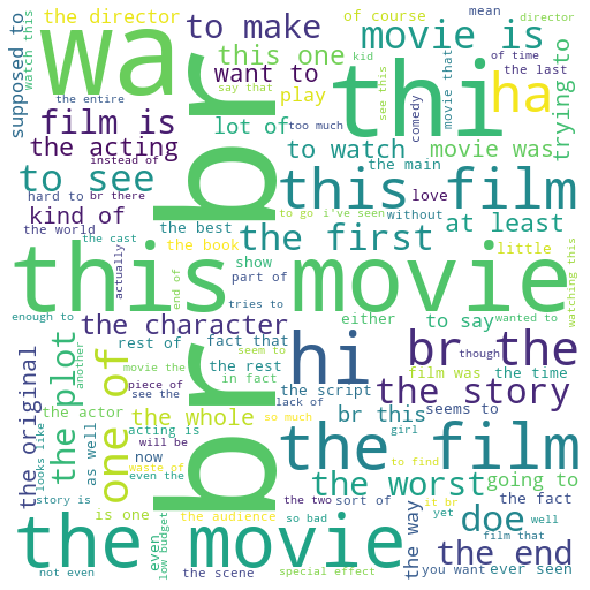

In [32]:
getWordCloud(dataset[dataset.sentiment == 0]['review'],True)

The word br is included in the text multiple times,this is the Html tag. Will need to remove this, along with that 
words like one , film , show are also common for both classes and dont show much meaning.

One thing to note here is that the words for both classes are quite similar. We could   try to check the wordclounds 
after removing the most recurring words.

In [105]:
from collections import Counter

def build_vocab(texts):
#     sentences = texts.apply(lambda x: x.split()).values
    vocab = Counter()
    for sentence in texts:
        vocab.update(sentence.split())
        
    return vocab

vocab = build_vocab(dataset['review'].map(lambda x: x.lower()))

In [118]:
# sorted(vocab.items(),key= lambda kv:(kv[1],kv[0]),reverse = True)

ignoring words which occur for more than 10000 times 

In [152]:


words_to_keep = [words for words,count in vocab.items() if count <= 10000]


# words_to_keep

for i in ['br','film','movie']:
    words_to_keep.remove(i)        


def getWordCloud(x):
    
    # the word cloud accepts a string
    comment_words = " "
    
    for sent in tqdm(x): 
        
          for val in sent.split():
            val = val.lower()



            if  val in words_to_keep and val not in words_to_remove:
                comment_words += " " + val
        
    
    print('prepared string')
    
    wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                min_font_size = 10).generate(comment_words) 
  
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
  
    plt.show() 
        

ValueError: list.remove(x): x not in list

100%|██████████| 12500/12500 [00:46<00:00, 269.96it/s]


prepared string


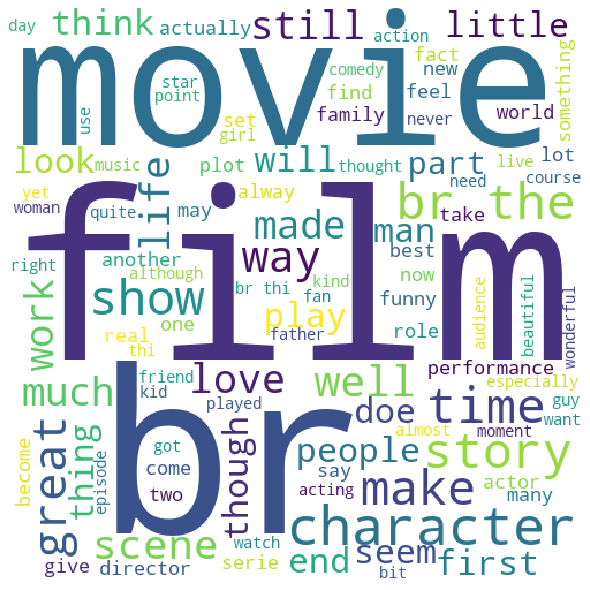

In [145]:
getWordCloud(dataset[dataset.sentiment == 1]['review'])

100%|██████████| 12500/12500 [00:41<00:00, 297.95it/s]


prepared string


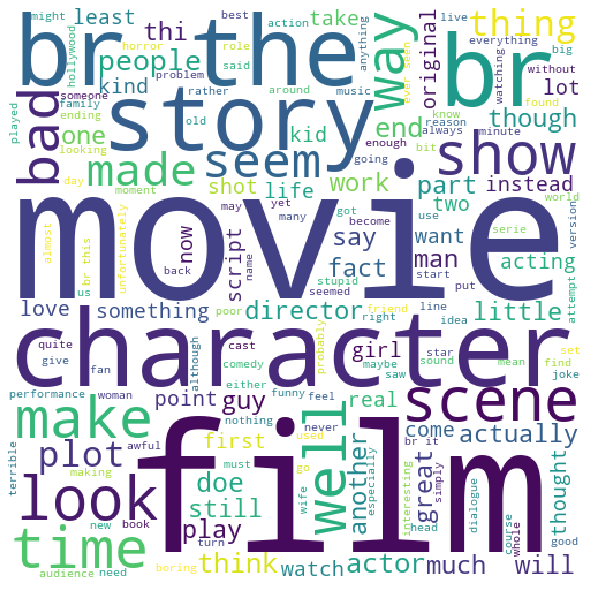

In [146]:
getWordCloud(dataset[dataset.sentiment == 0]['review'])


1. check the number of words Unique
2. check the number of punctuations
3. Digits
4. other special chatarters.
5. get the max , min , avg. length


In [82]:
re.sub('\,|\.','','11,33')

'1133'

In [83]:
import string 
import re 
words = []
numbers = []
punctuations = []
need_cleaning = []
chars = []

def is_number(x):
    
    x = re.sub('\,|\.','',x)
    
    if x.isdigit():
        return True
    elif '$' in x and x[1:].isdigit():
        return True
    
    
    return False
    



for word in vocab.keys():

    if is_number(word):
      numbers.append(word)
    elif len(word) == 1 and word in string.punctuation:
      punctuations.append(word)
    elif len(word) == 1:
      chars.append(word)
    else:
       words.append(word)    



In [84]:
print(f'number of words {len(words)}')
print(f'number of digits {len(numbers)}')
print(f'number of punct {len(punctuations)}')
print(f'number of chars {len(chars)}')


number of words 285265
number of digits 1363
number of punct 30
number of chars 61


# Lets take a closer look at the words 

In [88]:
sorted(words)[200:]

['$90!',
 '$^@%.',
 '$h!t',
 '$hit',
 '$money$.',
 '%$@#',
 '%99',
 '&*%#@#^',
 '&,',
 '&,believe',
 '&/or',
 '&2\\".',
 '&:35',
 '&Robin',
 '&Spice',
 '&^@_+#!*',
 '&and',
 '&c,',
 '&nudity',
 '&tc.,',
 "''",
 "''<br",
 "''After",
 "''Cannibal",
 "''Empire",
 "''Family",
 "''Gaslight''",
 "''Holy",
 "''I'm",
 "''Inuyasha''",
 "''Maison",
 "''Ned''",
 "''Peeping",
 "''Ranma",
 "''Return",
 "''Saint",
 "''Scarface''",
 "''Sea",
 "''Talent",
 "''The",
 "''This",
 "''Thunderball",
 "''We're",
 "''Zero",
 "''a",
 "''bad",
 "''clients''.",
 "''dark''",
 "''heart''",
 "''high",
 "''human''",
 "''humans''",
 "''if",
 "''little''",
 "''negative''",
 "''nice",
 "''oh",
 "''oversexed''",
 "''professionals''",
 "''raptors''",
 "''terrorists''",
 "''the",
 "''their",
 "''troubled''",
 "''unpleasant",
 "''villain",
 "''voyeur''",
 "''while''",
 "''your",
 "')",
 "'*name",
 "',.",
 "'...",
 "'...before",
 "'...needs",
 "'0/10'",
 "'00s",
 "'00s.",
 "'01",
 "'02",
 "'02.",
 "'06",
 "'06)",
 "'06,",
 

lot of the words are corrupted by punctuations while other like $hit are purposely written in that way will need to handle this in the preprocessing part. Some of this words are really important as they can help show sentiment.

An easy way to handle these words is to map them to come id like #1231. The problem is we dont know how many 
such words are present we can use external data from the web to find out the most common used words.


Aside for thise orher words there are words like 'Backbeat'.<br,Batman:,\'B\'\\" which include punctuations marks


# checking the punctuations

In [89]:
punctuations

['.',
 '-',
 ',',
 ':',
 '(',
 '&',
 '?',
 ')',
 '=',
 '/',
 '*',
 '!',
 '%',
 '\\',
 '~',
 '#',
 '"',
 "'",
 '>',
 '+',
 '$',
 '@',
 '}',
 '`',
 ';',
 '{',
 '[',
 '_',
 '<',
 ']']

Yes this list includes all common punctuatiosn.

# Checking Charaters 

In [92]:
chars

['i',
 'a',
 'I',
 'A',
 'R',
 '\x96',
 'L',
 'Q',
 'B',
 'S',
 'o',
 'n',
 'G',
 'O',
 'D',
 'v',
 '–',
 'u',
 'X',
 'V',
 's',
 'P',
 'H',
 '®',
 'y',
 'J',
 'K',
 '\x97',
 'T',
 'E',
 'U',
 'N',
 'Z',
 'x',
 'b',
 'r',
 'f',
 'C',
 'e',
 'F',
 'à',
 'W',
 '½',
 'd',
 'l',
 'Y',
 'M',
 'c',
 'h',
 'z',
 'm',
 't',
 'w',
 '¨',
 'p',
 '\uf0b7',
 '\x95',
 'À',
 '¾',
 '»',
 '·']

well we should have had only 52 characters including the lower. There are special charaters 
which were not included in the punctuations like ¾,\uf0b7


# List of special characters

In [97]:
def is_chars(x):
    
    
    if ord(x)>=65 and ord(x)<=90 or ord(x) >=97 and ord(x)<=122:
        return True
    
    else:
        return False
    
special_chars_to_remove = []

for i in chars:
    
    if not is_chars(i):
        special_chars_to_remove.append(i)
        
        
        
special_chars_to_remove           
    

['\x96', '–', '®', '\x97', 'à', '½', '¨', '\uf0b7', '\x95', 'À', '¾', '»', '·']

This special characters will be included in the final remove punctuation list

Lower casing all the words

In [100]:
lower_cased_words = set(list(map(lambda x : x.lower(),words)))

print(f'final word count after lower casing {len(lower_cased_words)}')

final word count after lower casing 256232


# Checking The digits

In [103]:
numbers

['20',
 '1951',
 '1975',
 '1',
 '50',
 '3000',
 '45',
 '1980',
 '1978.',
 '3',
 '12',
 '2022',
 '1939',
 '1985',
 '15',
 '0',
 '10',
 '1,600',
 '300',
 '$9.95',
 '$20,',
 '$29.95,',
 '75',
 '1933',
 '87',
 '2000',
 '17',
 '166',
 '6,5',
 '2007,',
 '$75',
 '$3',
 '147',
 '145',
 '1968',
 '2',
 '$1.2',
 '8',
 '1988',
 '1938',
 '1996',
 '101',
 '2.',
 '3.',
 '4.',
 '5.',
 '6.',
 '7.',
 '6',
 '1957',
 '30',
 '100',
 '4',
 '$1600',
 '10.',
 '14',
 '1983.',
 '1983,',
 '88',
 '3.7',
 '11',
 '1958',
 '1959',
 '1976,',
 '2007.',
 '9',
 '1,',
 '2,',
 '3,',
 '4,',
 '5,',
 '6,',
 '7,',
 '8.',
 '40',
 '8,',
 '1998',
 '1999',
 '$9.99',
 '747.',
 '1970.',
 '1970',
 '2038.',
 '18',
 '64',
 '7',
 '45.',
 '79,',
 '1992',
 '1984',
 '11,',
 '1973,',
 '50,000',
 '5',
 '$20',
 '1969,',
 '007',
 '2007',
 '$5',
 '1935',
 '1934',
 '1936',
 '41',
 '60',
 '1935,',
 '27.',
 '13',
 '25',
 '11.',
 '16',
 '13.',
 '5,5',
 '80',
 '1971.',
 '0.5',
 '1994',
 '1944,',
 '10,',
 '28',
 '1982,',
 '2008,',
 '77',
 '26',
 '48

Aside form normal numbers the we have digits having $ , . and  , While $ and , can be easily replace to '', the 
we need to take special care with '.' if its the second last character meaning 1000.0 then we cant simply remove 
the '.' as that would change the value. who said 0 has no value ;).

## Knowing about the different punctuations , digits and other charactes is important when we are using pre-trained embeddings. As Increasing the word-coverage is more important.

# Extracting MetaData


1. Number of words in the text
2. Number of unique words in the text
3. Number of characters in the text
4. Number of stopwords
5. Number of punctuations
6. Number of upper case words
7. Number of title case words
8. Average length of the words

this section is inspired by the followring notebook
https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-qiqc


In [165]:
## Number of words in the text ##
dataset["num_words"] = dataset["review"].apply(lambda x: len(str(x).split()))

## Number of unique words in the text ##
dataset["num_unique_words"] = dataset["review"].apply(lambda x: len(set(str(x).split())))

## Number of characters in the text ##
dataset["num_chars"] = dataset["review"].apply(lambda x: len(str(x)))

## Number of stopwords in the text ##
dataset["num_stopwords"] = dataset["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

## Number of punctuations in the text ##
dataset["num_punctuations"] =dataset['review'].apply(lambda x: len([c for c in str(x) if c in punctuations]))

## Number of title case words in the text ##
dataset["num_words_upper"] = dataset["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

## Number of title case words in the text ##
dataset["num_words_title"] = dataset["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

## Average length of the words in the text ##
dataset["mean_word_len"] = dataset["review"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))


In [158]:
dataset.head()

,id,sentiment,review,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,num_words_upper,num_words_title,mean_word_len
0,5814_8,1,With all this stuff going down at the moment w...,433,246,2302,210,67,10,33,4.318707
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",158,116,946,72,42,4,25,4.993671
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,378,265,2449,131,71,4,65,5.481481
3,3630_4,0,It must be assumed that those who praised this...,379,237,2245,177,94,2,31,4.926121
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,367,265,2231,152,66,3,36,5.081744


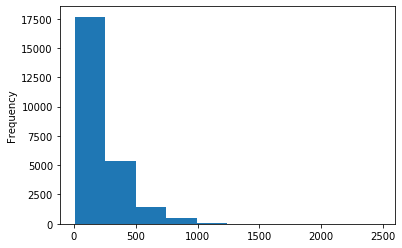

In [157]:
dataset['num_words'].plot.hist()

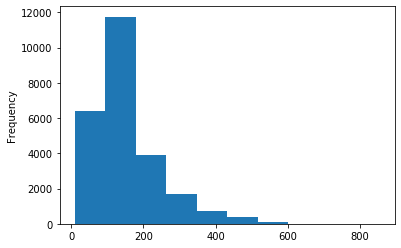

In [159]:
dataset['num_unique_words'].plot.hist()

# Plots Comparing Meta Features w.r.t both classes

# Which class has longer reviews ?

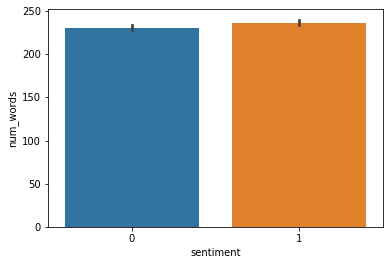

In [160]:
sns.barplot(x = dataset['sentiment'],y=dataset['num_words'])

### The positive class has more number of words but the difference is small.

# Which class has more unique number of words ?

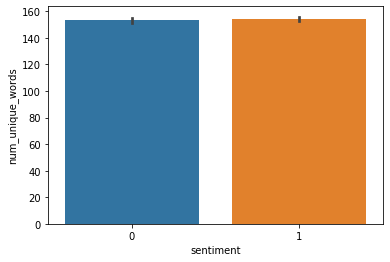

In [164]:
sns.barplot(x = dataset['sentiment'],y=dataset['num_unique_words'])

# which class has more punctuations 

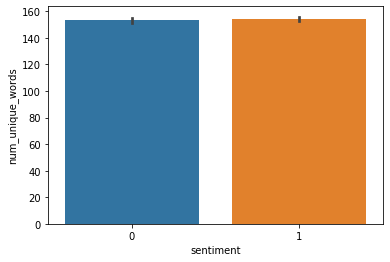

In [176]:
sns.barplot(x = dataset['sentiment'],y=dataset['num_unique_words'])

# A Short Cut - Look at different Meta features

In [166]:
dataset.groupby(['sentiment']).mean()

,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,num_words_upper,num_words_title,mean_word_len
sentiment,,,,,,,,
0,230.86808,153.16848,1305.72192,107.70424,56.74960,5.16712,24.80072,4.638958
1,236.70720,154.17384,1349.69920,108.81160,54.71256,4.53352,28.58152,4.670515


### Well in out dataset almost all the features are pretty close. This is very small difference between them but even so this meta-features can may be provide us with some more information other than just using text.

# Plots For Visualzing the N-gram parameter

Selecting the value of n is quite important. We can reduce the time taken when trying different values for N 
by visualizing it. If We can find sentiment if from the plots than the model can do so too.

This also helps for inference and intepreting the results 



In [231]:
from collections import defaultdict

classes = [1,0]

def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != ""]

    ngrams = zip(*[token[i:] for i in range(n_gram)])
    
    
    return [" ".join(ngram) for ngram in ngrams]
    


def plot_ngrams(classes,n=1):    

    fig,ax = plt.subplots(len(classes),1,figsize = (8,10))
    plt.subplots_adjust(right = 1)
    
    for i,axs in zip(classes,ax):

        dic = defaultdict(int)
        plt.figure()

        for j in dataset[dataset['sentiment'] == i]['review']:

            for words in generate_ngrams(j,n):
                dic[words] += 1

        #sorting the words
        fd_sorted = pd.DataFrame(sorted(dic.items(), key=lambda x: x[1])[::-1])
        fd_sorted.columns = ["word", "wordcount"]

        sns.barplot(x = fd_sorted['wordcount'][0:5],y = fd_sorted['word'][0:5],ax = axs)
        axs.set_title(f'class = {i}')
        
    plt.show()   

# Unigram

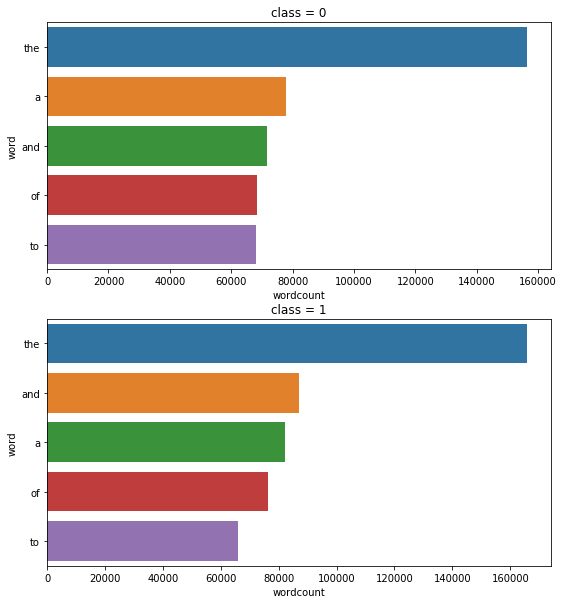

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [232]:
plot_ngrams(classes = [0,1],n = 1)

### Both  the classes have similar words, we can't make any conclusion by just one word.

# Bi-Grams

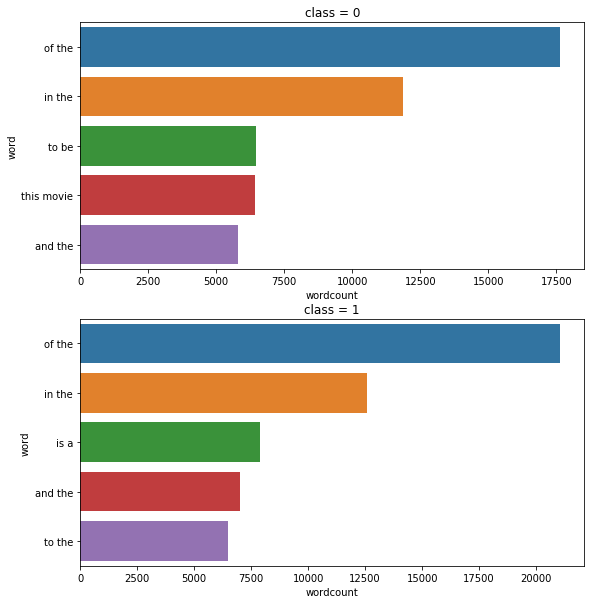

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [233]:
plot_ngrams(classes = [0,1],n = 2)

## N = 3

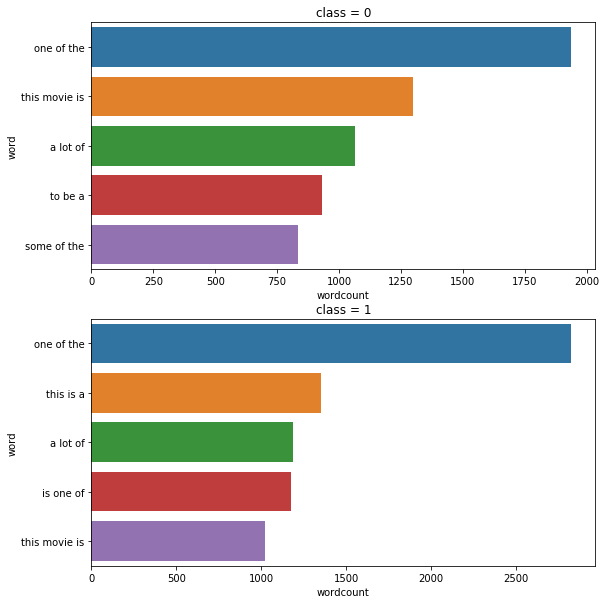

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [234]:
plot_ngrams(classes = [0,1],n = 3)

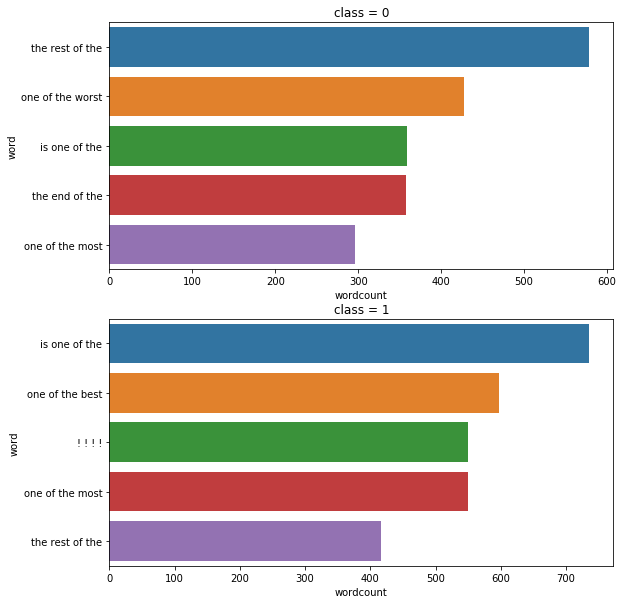

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [235]:
plot_ngrams(classes = [0,1],n = 4)

### Now we can start differentiating between positive and negative. For the positive reviews the ! is used a lot remove this in the preprocessing step. We can also try including this as a meta feature.  No. of ! in +ve Vs -ve.

# N = 5

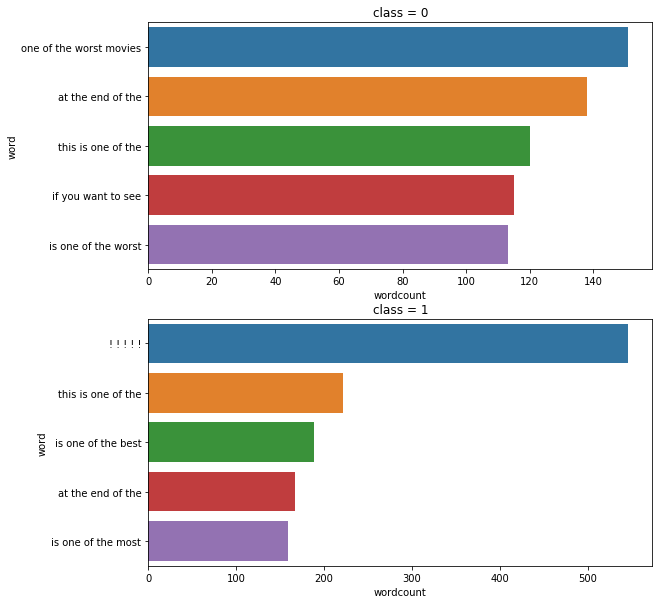

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [236]:
plot_ngrams(classes = [0,1],n = 5)

# N = 6

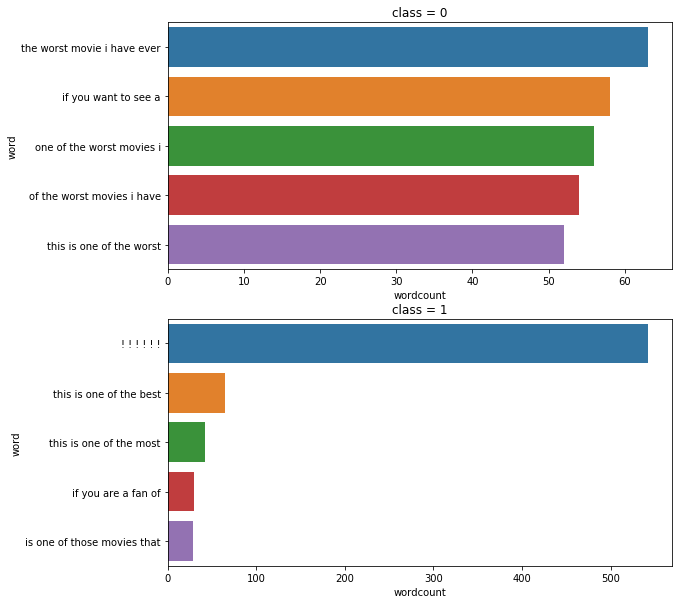

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [237]:
plot_ngrams(classes = [0,1],n = 6)

## We can go with N = 3 and more but  N = 1 will not do us any good.

# No. of ! is +ve Vs -ve

In [242]:
re.findall('!','dsdasdd dsa d a !! ! !!!!!! dasdds')

['!', '!', '!', '!', '!', '!', '!', '!', '!']

In [244]:
dataset['num_exclamations'] =  dataset['review'].map(lambda x : len(re.findall('!',x)))

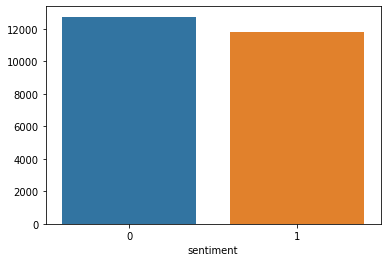

In [250]:
emark = dataset.groupby(['sentiment']).sum()['num_exclamations']

sns.barplot(emark.index,emark.values)

## Wow! ok i was not excepting that 

# Visualizing Important Words

For this we require to train a model 

In [262]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(3,6))

X = tfidf_vec.fit_transform(dataset['review'])
Y = dataset['sentiment']


In [263]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(X,Y)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [264]:
import eli5
eli5.show_weights(model, vec=tfidf_vec, top=100, feature_filter=lambda x: x != '<BIAS>')

Weight?,Feature
+1.497,br br great
+0.919,does great job
+0.918,br br film
+0.902,br 10 10
+0.902,br br 10 10
+0.871,did great job
+0.823,br br highly
+0.753,does good job
+0.674,br br excellent
+0.636,love br br


 The word or tag br occurs lot of times we will have to remove this as it spoiling the data

### This is it for now. But I will be adding new things as I learn more stuff.